In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib as mpl
import joblib

In [2]:
tf.constant([[1.,2.,3.,], [3., 5., 6.,]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [3., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(43)

<tf.Tensor: shape=(), dtype=int32, numpy=43>

In [11]:
tensor = tf.constant([[1.,2.,3.,], [3., 5., 6.,]])
tensor.shape

TensorShape([2, 3])

In [7]:
tensor.dtype

tf.float32

In [9]:
tensor[:1, 1:]

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2., 3.]], dtype=float32)>

In [13]:
tensor[:, 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [14]:
# 모든 종류의 텐서 연산도 가능
tensor + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [13., 15., 16.]], dtype=float32)>

In [15]:
tf.square(tensor)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [ 9., 25., 36.]], dtype=float32)>

In [16]:
tensor @ tf.transpose(tensor)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 31.],
       [31., 70.]], dtype=float32)>

In [17]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(tensor))+10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 19.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

In [18]:
import numpy as np
a = np.array([2.,4.,5.,])


In [19]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [20]:
tensor.numpy()

array([[1., 2., 3.],
       [3., 5., 6.]], dtype=float32)

In [21]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [22]:
np.square(tensor)

array([[ 1.,  4.,  9.],
       [ 9., 25., 36.]], dtype=float32)

In [25]:
t = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [26]:
v = tf.Variable([[1.,2.,3.,], [4.,5.,6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [27]:
# assign으로 데이터 교체
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [28]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [29]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [31]:
v.scatter_nd_update(indices=[[0,0], [1,2]], updates=[100.,200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [32]:
# 후버 loss 구현
def huber_func(y_true, y_pred):
  error= y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) / 2
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error, squared_loss, linear_loss)

In [38]:
from tensorflow import keras
# 이미지 분류기 데이터셋부터 시작
fashion_mnist = keras.datasets.fashion_mnist

In [39]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [69]:
# 훈련셋 / 검증셋 분리
X_valid , X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [70]:
class_name=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [71]:
class_name[y_train[1]]

'T-shirt/top'

In [72]:
# 다층 퍼셉트론 로드

model = keras.models.Sequential()
model

In [46]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))



In [73]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(300, activation = "relu"),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.Dense(10, activation = "softmax")])
model.summary() # 요약

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.layers

In [50]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [51]:
model.get_layer('dense_3') is hidden1

True

In [53]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03757928, -0.07172867, -0.05090143, ...,  0.05937862,
         0.06566997, -0.03775674],
       [-0.06950983, -0.05272398, -0.03335382, ..., -0.03372594,
        -0.00670221,  0.04838908],
       [ 0.05621742,  0.07174325, -0.07113795, ...,  0.03076304,
        -0.01843935, -0.07003978],
       ...,
       [-0.00927488,  0.04933241, -0.01225727, ...,  0.04494375,
        -0.01596323, -0.01500624],
       [ 0.03704835, -0.05117651, -0.03445067, ...,  0.02236068,
        -0.06736333, -0.06670524],
       [ 0.03537624, -0.04957579, -0.04240349, ...,  0.0728922 ,
         0.07015799,  0.03108466]], dtype=float32)

#### 모델 컴파일

In [74]:
# compile() 호출
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

#### 학습 시작
> epoch 30회부터 시작

In [75]:

%time
# 다층 퍼셉트론
# 학습 시작
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7121 - accuracy: 0.7646 - val_loss: 0.5025 - val_accuracy: 0.8356
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4870 - accuracy: 0.8292 - val_loss: 0.4731 - val_accuracy: 0.8292
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4430 - accuracy: 0.8446 - val_loss: 0.4135 - val_accuracy: 0.8618
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4168 - accuracy: 0.8542 - val_loss: 0.4045 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3968 - accuracy: 0.8621 - val_loss: 0.3955 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3789 - accuracy: 0.8659 - val_loss: 0.3895 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - lo

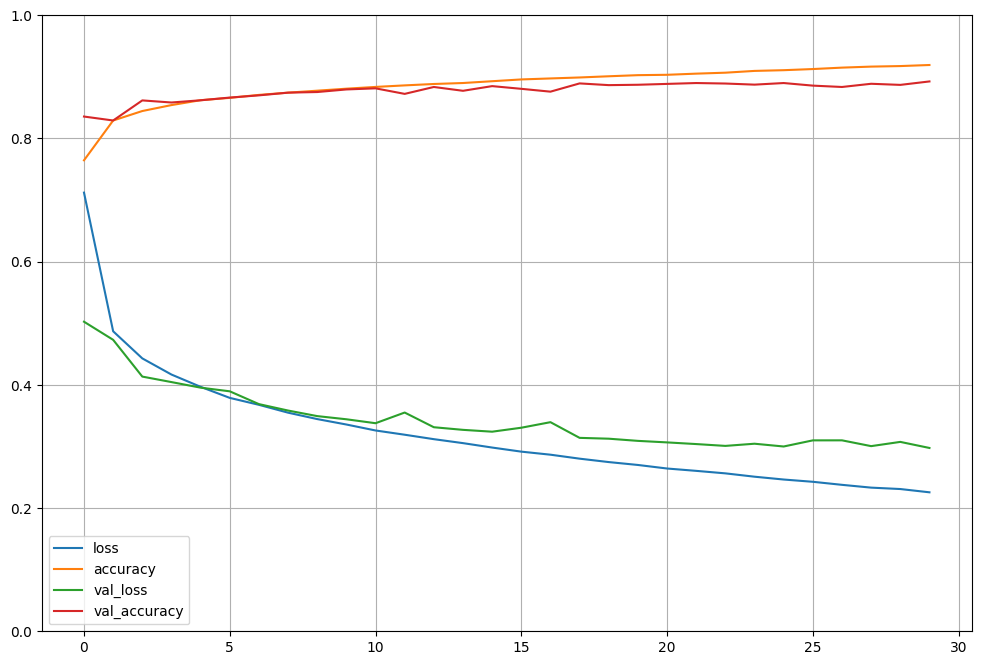

In [76]:
# 시각화
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [77]:
# 테스트셋으로 모델 평가

In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.8949 - accuracy: 0.1000


[2.894911289215088, 0.10000000149011612]

In [104]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
# 예측 생성
y_proba.round(2)

1/1 [==============================] - 0s 34ms/step


array([[0.1 , 0.02, 0.05, 0.13, 0.01, 0.45, 0.12, 0.09, 0.03, 0.01],
       [0.1 , 0.02, 0.05, 0.13, 0.01, 0.42, 0.13, 0.09, 0.03, 0.01],
       [0.11, 0.02, 0.05, 0.14, 0.01, 0.43, 0.13, 0.09, 0.03, 0.01],
       [0.1 , 0.02, 0.05, 0.14, 0.01, 0.43, 0.13, 0.09, 0.02, 0.01]],
      dtype=float32)

In [105]:
y_pred = model.predict(X_new)
y_pred = y_pred.argmax(axis=-1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([5, 5, 5, 5])

In [106]:
np.array(class_name)[y_pred]

array(['Sandal', 'Sandal', 'Sandal', 'Sandal'], dtype='<U11')

In [107]:
y_new = y_test[:4]
y_new
# 예측이 빗나가는 상황

array([9, 2, 1, 1], dtype=uint8)

#### 회귀용 다층 퍼셉트론 - 주택가격 데이터셋

In [108]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])

In [109]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [110]:
# 학습
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.1644 - val_loss: 0.5494
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5175 - val_loss: 0.5318
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4611 - val_loss: 0.4225
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4362 - val_loss: 0.4357
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4218 - val_loss: 0.3965
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4089 - val_loss: 0.3890
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4030 - val_loss: 0.3853
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3975 - val_loss: 0.3817
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3952 - val_loss: 0.3848
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3883 - val_loss: 0.3741

0.374308705329895

In [111]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 222ms/step


array([[2.1394558],
       [1.0774128],
       [1.3298687]], dtype=float32)

In [112]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
# 1차 DNN

In [113]:
# 2차 DNN
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [114]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_18 (Dense)               (None, 30)           930         ['dense_17[0][0]']               
                                                                                            

In [ ]:
# 컴파일부터 시작

In [33]:
model.compile(loss=huber_func, optimizer="nadam")
model.fit(X_train, y_train)

NameError: ignored